In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm, datasets

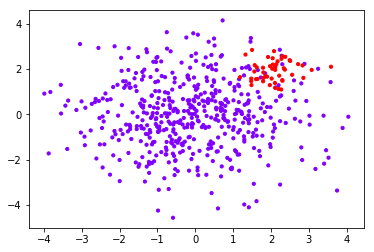

In [18]:
# 模拟样本不均衡问题
class_1 = 500 # 类别1有500个样本
class_2 = 50 # 类别2有50个样本  
# 设置这两个类别的中心
centers = [[0, 0], [2.0, 2.0]]
# 设置这两个类的方差 方差越大 波动越大
clusters_std = [1.5, 0.5]
X, y = datasets.make_blobs(n_samples=[class_1, class_2], 
                           centers=centers, 
                           cluster_std=clusters_std,
                           random_state=0,
                           shuffle=False
                          )
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=10)

In [19]:
# 在数据集上建模
# 不设定权重
clf = svm.SVC(kernel='linear').fit(X, y)
print('未设置权重的准确率：%.3f' % clf.score(X, y))

# 设置class_weight权重
wclf = svm.SVC(kernel='linear', class_weight={1: 10}).fit(X,y)
print('设置权重后的准确率：%.3f' % wclf.score(X, y))

未设置权重的准确率：0.942
设置权重后的准确率：0.913


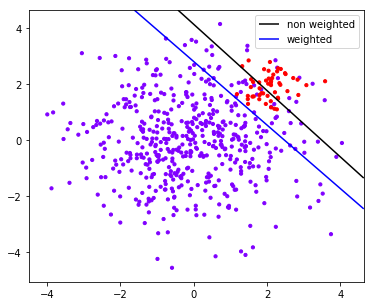

In [20]:
# 绘制两个模型下数据的决策边界
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=10)
ax = plt.gca()
x_min, x_max = X[:, 0].min() - 0.5, X[:, 1].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.mgrid[x_min: x_max: 200j, y_min: y_max: 200j]
# 样本点到决策边界距离， 未设置权重
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
a = ax.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

# 样本点到决策边界的距离，设置权重
Z = wclf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
b = ax.contour(xx, yy, Z, colors='b', levels=[0], linestyles=['-'])
# 设置图例  a.collections就是绘制的等高线
plt.legend([a.collections[0], b.collections[0]], ['non weighted', 'weighted'])
plt.show()

In [24]:
# 精确度 precision
# 未设置权重  精确度是在所有的预测为1的样本中，预测正确且标签为1所占的比例
# 精确度越低 代表误伤的多数类越多
p = (y[y == clf.predict(X)] == 1).sum() / (clf.predict(X) == 1).sum()
print('未设置权重后的精确度：%.2f' % p)

# 设置权重后的精确度
wp = (y[y == wclf.predict(X)] == 1).sum() / (wclf.predict(X) == 1).sum()
print('设置权重后的精确度：%.2f' % wp)

未设置权重后的精确度：0.71
设置权重后的精确度：0.51


In [25]:
# recall 召回率/敏感度/查全率
# 在所有真实为1的样本中，被正确预测为1的样本所占的比例
# 召回率越高，代表我们尽量捕捉越多的少数类
r = (y[y == clf.predict(X)] == 1).sum() / y[y == 1].sum()
print('未设置权重后的召回率：%.2f' % r)

wr = (y[y == wclf.predict(X)] == 1).sum() / y[y == 1].sum()
print('设置权重后的召回率：%.2f' % wr)

未设置权重后的召回率：0.60
设置权重后的召回率：1.00


In [26]:
# 假负率 1- racall
# 假负率是在所有真实为1的数据中，被错判为0样本所占的比例


In [32]:
# 特异度 表示在所有真实为0的样本中，被正确预测为0的样本所占的比例
# 特异度衡量了一个模型判断正确的能力
sf = (y[y == clf.predict(X)] == 0).sum() / (y == 0).sum()
print('未设置权重后的特异度：%.2f' % sf)

wsf = (y[y == wclf.predict(X)] == 0).sum() / (y == 0).sum()
print('设置权重后的特异度：%.2f' % wsf)


未设置权重后的特异度：0.98
设置权重后的特异度：0.90


In [ ]:
# 假正率  1- 特异度
# 假正率 就是一个模型将多数类判断错误的能力